# Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.metrics import r2_score

# Data

## Data Import

In [4]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df.head(2)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0


# Exploratory Graphical Analysis

## Histogram

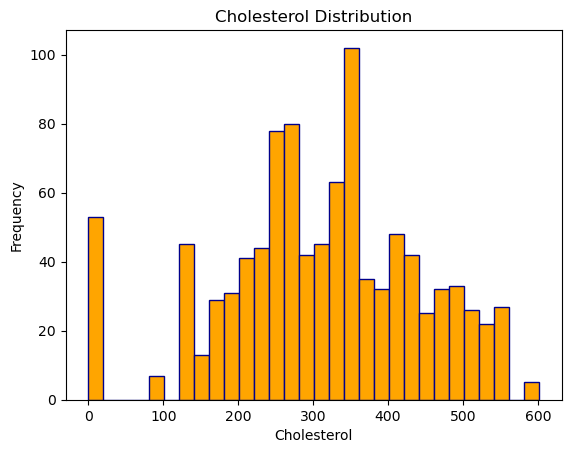

count    1000.000000
mean      311.447000
std       132.443801
min         0.000000
25%       235.750000
50%       318.000000
75%       404.250000
max       602.000000
Name: serumcholestrol, dtype: float64

In [5]:
plt.hist(df['serumcholestrol'], bins=30, color='orange', edgecolor='darkblue')
 
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution')
 
plt.show()
df['serumcholestrol'].describe()

#### Data Conversion

In [6]:
df['Gender'] = df['gender'] 

In [7]:
Gender = {0: 'Female', 1: 'Male'}
df['Gender'] = df['Gender'].replace(Gender)

#### Cholesterol Comparison among Genders

<Figure size 3000x1500 with 0 Axes>

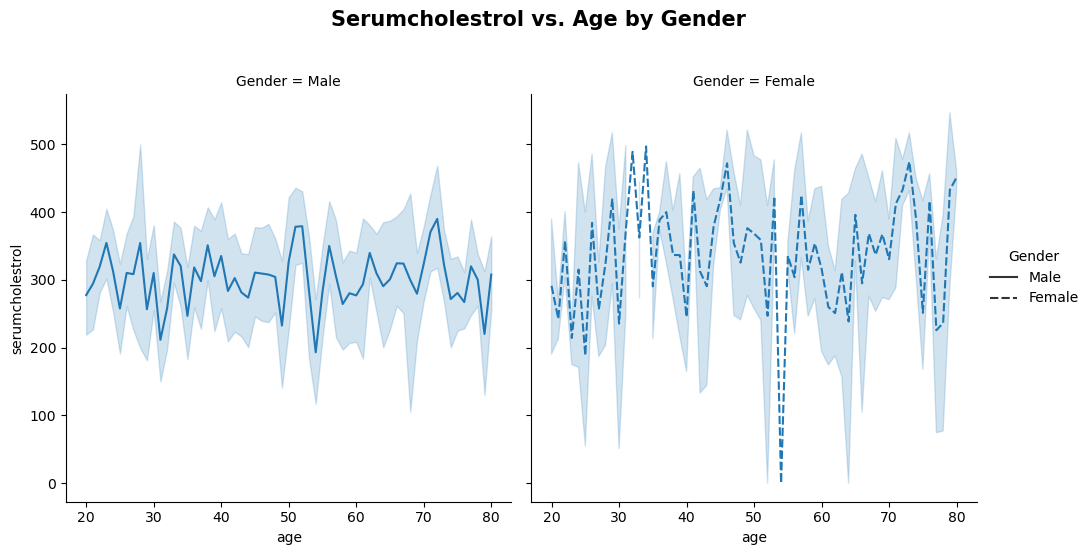

In [8]:
plt.figure(figsize=(30,15))
plot = sns.relplot(data = df, x = 'age', y = 'serumcholestrol', kind = 'line', hue = df['Gender'].map(Gender), style = 'Gender', col = 'Gender')


plt.suptitle(f"Serumcholestrol vs. Age by Gender", y = 1.10, fontsize = 15,fontweight = "bold")

plt.show()

<Axes: >

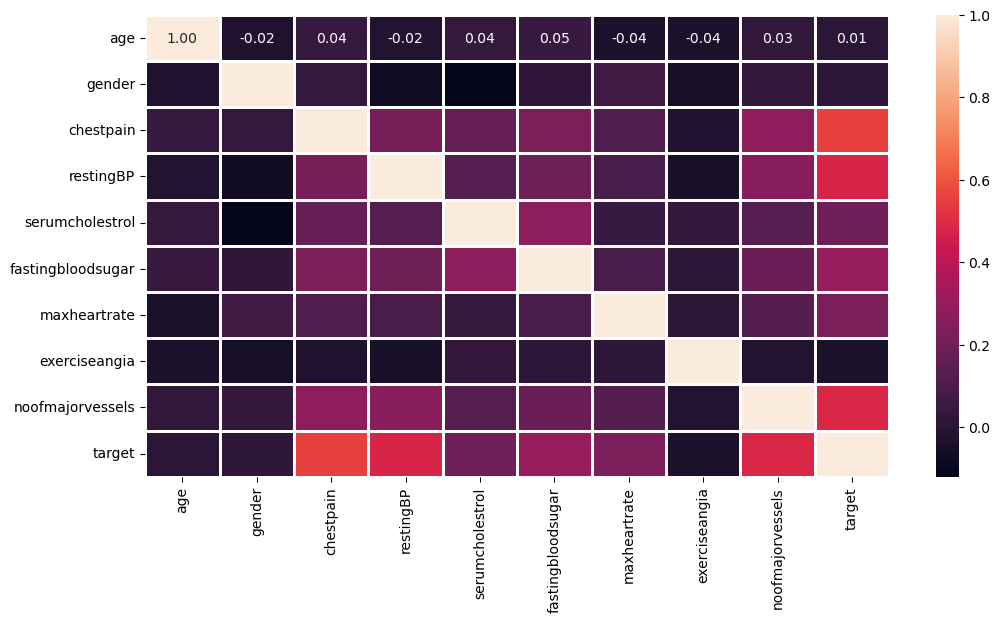

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'rocket',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# Data Review and Exploration 

## Missing Data Review

In [9]:
Cardiovascular_Disease_NaN = df.isna().sum()

print(Cardiovascular_Disease_NaN)

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
Gender               0
dtype: int64


## Descriptive Statistics 

In [10]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


## Types, Shape, and Columns

In [11]:
df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
Gender                object
dtype: object

In [12]:
print(df.shape)

(1000, 15)


In [13]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target', 'Gender'],
      dtype='object')

# Data Processing 

In [15]:
df = df.drop('patientid', axis=1)

In [16]:
df = df.drop('restingrelectro', axis=1) 

In [17]:
df = df.drop('oldpeak', axis=1)  

In [18]:
df = df.drop('slope', axis=1)  

In [19]:
df = df.drop('Gender', axis=1)  

In [20]:
df.head(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,noofmajorvessels,target
0,53,1,2,171,0,0,147,0,3,1
1,40,1,0,94,229,0,115,0,1,0


# Modeling

### Data Model 1 - KNN

In [34]:
X = df.drop('target', axis=1)  
y = df['target']  

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier())])

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [38]:
accuracy = pipeline.score(X_test, y_test)

print("The accuracy of the KNN classifier from the test set is: {:.2f}".format(accuracy*100),"%")

The accuracy of the KNN classifier from the test set is: 87.50 %


In [39]:
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11], 
    'classifier__weights': ['uniform', 'distance'], 
    'classifier__p': [1, 2],  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy with Hyperparameters:", accuracy)

Best Hyperparameters: {'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}
Accuracy with Best Hyperparameters: 0.915


### Data Model 2 - Linear Regression

In [40]:
model = linear_model.LinearRegression()

In [41]:
model.fit(X,y)

LinearRegression()

In [42]:
model = sm.OLS(y_train, X_train).fit() 

In [43]:
prediction = model.predict(X_test)

In [44]:
print("The R squared of this Linear Regression Model is: {:.2f}".format(r2_score(y_test, prediction)))

The R^2 score of the Linear Regression model is: 0.52
